In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [4]:
#Reading the dataset
data = pd.read_csv("kidney_disease.csv")
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
#getting the shape of the dataset
data.shape

(400, 26)

In [6]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [7]:
#getting the information about the dataset contents
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

# Data Preprocessing


In [8]:
categorial_cols = [col for col in data.columns if data[col].dtype=="object"]
categorial_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [9]:
numerical_cols = [x for x in data.columns if not x in categorial_cols]
numerical_cols

['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [10]:
for i in ['rc','wc','pcv']:
    data[i] = data[i].str.extract('(\d+)').astype(float)

## Simple Imputing

In [11]:
#filling the null values with the mean values
for i in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
    data[i].fillna(data[i].mean(),inplace=True)

## OneHot Encoding

In [12]:
#converting the categorial data by using oneHot Encoding
rbc = pd.get_dummies(data[["rbc"]],drop_first=True)
rbc.head()

,rbc_normal
0,0
1,0
2,1
3,1
4,1


In [13]:
pc = pd.get_dummies(data[["pc"]],drop_first=True)
pc.head()

,pc_normal
0,1
1,1
2,1
3,0
4,1


In [14]:
pcc = pd.get_dummies(data[["pcc"]],drop_first=True)
pcc.head()

,pcc_present
0,0
1,0
2,0
3,1
4,0


In [15]:
ba = pd.get_dummies(data[["ba"]],drop_first=True)
ba.head()

,ba_present
0,0
1,0
2,0
3,0
4,0


In [16]:
#dropping the categorial data columns
data.drop(["rbc","pc","pcc","ba"],axis=1,inplace=True)

In [17]:
data.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,...,44.0,7800.0,5.000000,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,...,38.0,6000.0,4.241636,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,...,31.0,7500.0,4.241636,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,...,32.0,6700.0,3.000000,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,...,35.0,7300.0,4.000000,no,no,no,good,no,no,ckd


In [18]:
#concating the data columns
data = pd.concat([data,rbc,pc,pcc,ba],axis=1)

In [19]:
data.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,dm,cad,appet,pe,ane,classification,rbc_normal,pc_normal,pcc_present,ba_present
0,0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,...,yes,no,good,no,no,ckd,0,1,0,0
1,1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,...,no,no,good,no,no,ckd,0,1,0,0
2,2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,...,yes,no,poor,no,yes,ckd,1,1,0,0
3,3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,...,no,no,poor,yes,yes,ckd,1,0,1,0
4,4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,...,no,no,good,no,no,ckd,1,1,0,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   bgr             400 non-null    float64
 7   bu              400 non-null    float64
 8   sc              400 non-null    float64
 9   sod             400 non-null    float64
 10  pot             400 non-null    float64
 11  hemo            400 non-null    float64
 12  pcv             400 non-null    float64
 13  wc              400 non-null    float64
 14  rc              400 non-null    float64
 15  htn             398 non-null    object 
 16  dm              398 non-null    object 
 17  cad             398 non-null    obj

In [21]:
#converting the age Data column into list
k=data["age"].apply(lambda x : int(x)//10).to_list()

In [22]:
#batching the ages(0-9,10-19,20-29,......90-99)
a=[0]*10
for i in range(len(k)):
    a[k[i]]+=1
a

[10, 11, 23, 43, 71, 91, 96, 47, 7, 1]

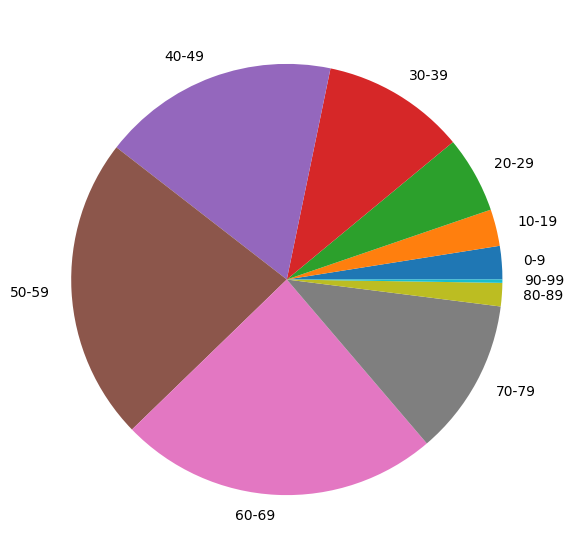

In [23]:
plt.figure(figsize= (7,7))
x_labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']
y_labels = np.array(a)
plt.pie(y_labels, labels = x_labels)
plt.show()

In [24]:
data["classification"].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [25]:
#replacing the values of notckd, ckd and ckd/t in the dataset
data.replace({"notckd":0,"ckd":1,"ckd\t":1},inplace=True)

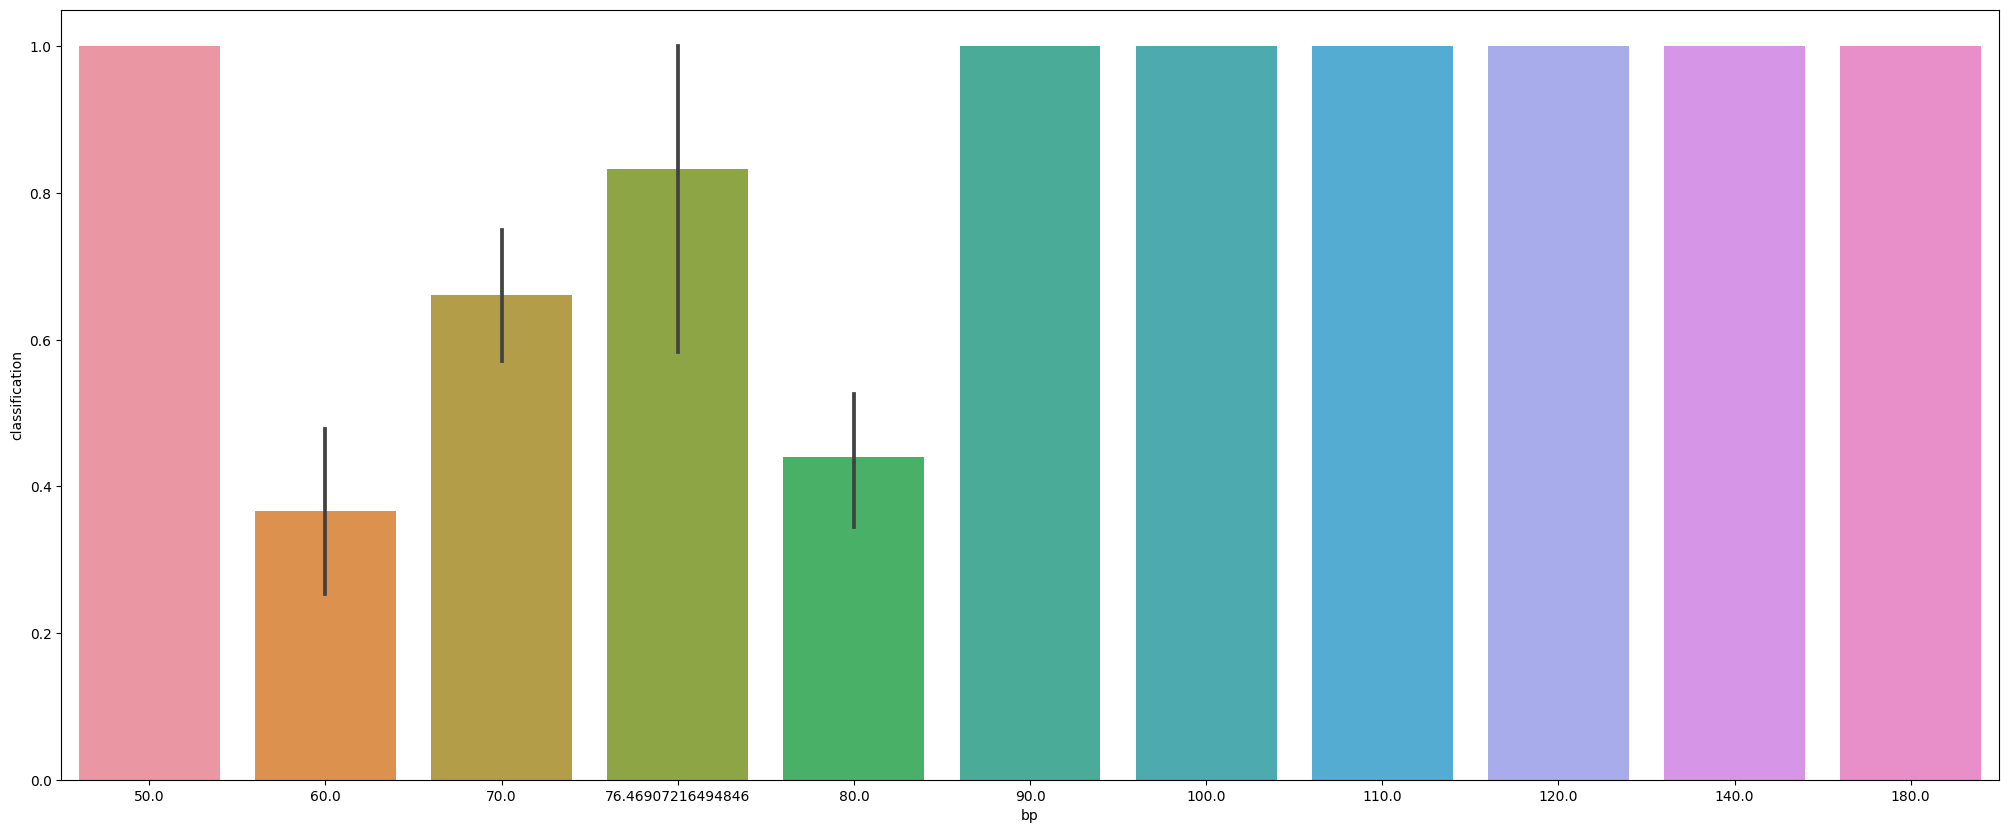

In [26]:
plt.figure(figsize=(25,10))
sns.barplot(x =data['bp'],y =data['classification'],data=data)
plt.show()

<Axes: xlabel='classification', ylabel='age'>

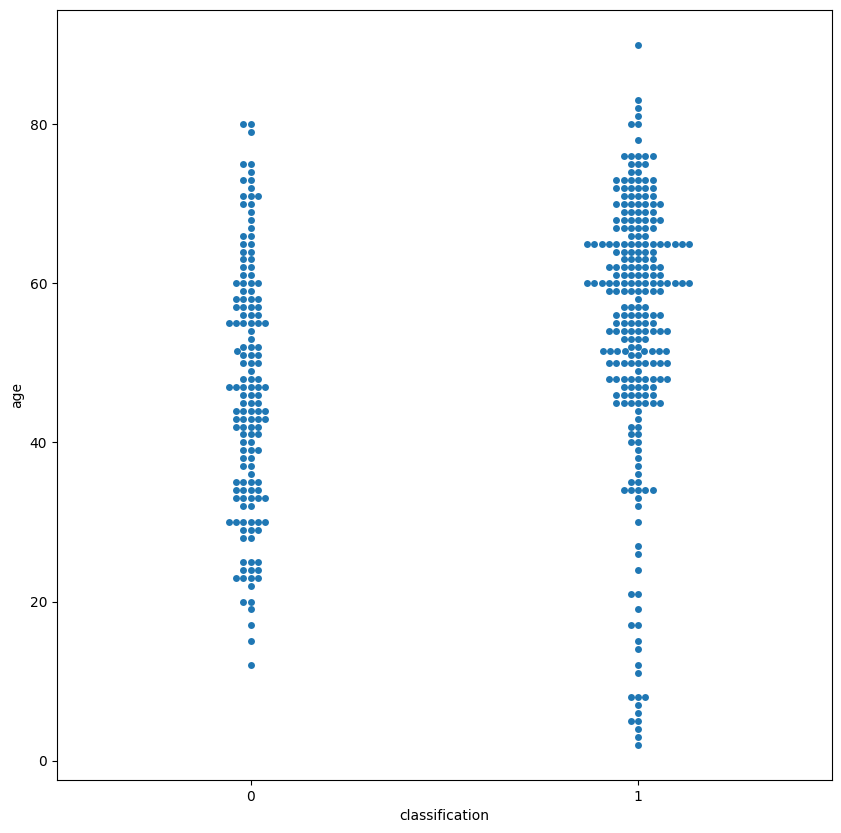

In [27]:
plt.figure(figsize=(10,10))
sns.swarmplot(y=data["age"], x = data["classification"])

In [28]:
data["appet"].value_counts()

good    317
poor     82
Name: appet, dtype: int64

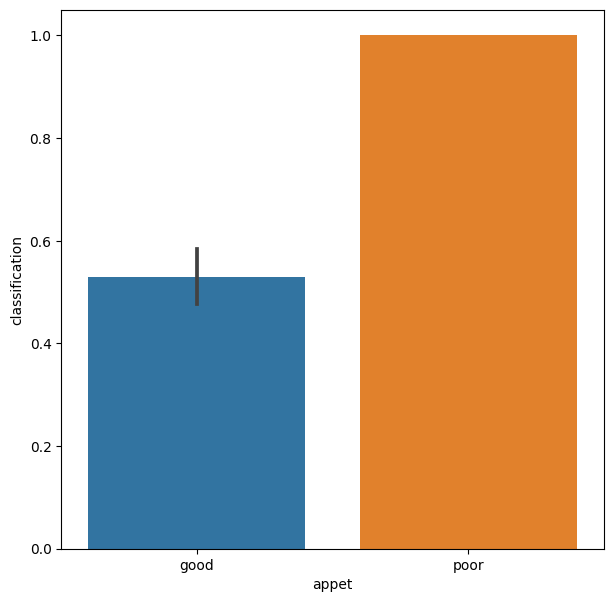

In [29]:
plt.figure(figsize=(7,7))
sns.barplot(x =data['appet'],y =data['classification'],data=data)
plt.show()

In [30]:
data.replace({"good":1,"poor":0},inplace=True)

In [31]:
data["ane"].value_counts()

no     339
yes     60
Name: ane, dtype: int64

In [32]:
#replacing the values of no, yes to 0,1 respectively
data.replace({"no":0,"yes":1,"\tno":0,"\tyes":1," yes":1},inplace=True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   bgr             400 non-null    float64
 7   bu              400 non-null    float64
 8   sc              400 non-null    float64
 9   sod             400 non-null    float64
 10  pot             400 non-null    float64
 11  hemo            400 non-null    float64
 12  pcv             400 non-null    float64
 13  wc              400 non-null    float64
 14  rc              400 non-null    float64
 15  htn             398 non-null    float64
 16  dm              398 non-null    float64
 17  cad             398 non-null    flo

In [34]:
#if still null values present then replacing the null value with the most frequent value in the column
data=data.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   bgr             400 non-null    float64
 7   bu              400 non-null    float64
 8   sc              400 non-null    float64
 9   sod             400 non-null    float64
 10  pot             400 non-null    float64
 11  hemo            400 non-null    float64
 12  pcv             400 non-null    float64
 13  wc              400 non-null    float64
 14  rc              400 non-null    float64
 15  htn             400 non-null    float64
 16  dm              400 non-null    float64
 17  cad             400 non-null    flo

# Splitting Train Data and Test Data

In [36]:
#getting the columns in the dataset
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification', 'rbc_normal', 'pc_normal', 'pcc_present',
       'ba_present'],
      dtype='object')

In [37]:
#seperating the data for the model as X contains the data which feed to the model and y contains the target column
X = data.loc[:,['age', 'bp', 'rc','wc','appet','pc_normal','htn','hemo','bgr','dm','ane']]
y = data["classification"]

In [38]:
#splitting the train data and test Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)
X_train.head()

,age,bp,rc,wc,appet,pc_normal,htn,hemo,bgr,dm,ane
336,25.0,60.0,5.000000,9200.000000,1.0,1,0.0,15.2,119.000000,0.0,0.0
64,55.0,80.0,4.241636,8406.122449,1.0,1,0.0,9.8,146.000000,0.0,0.0
55,35.0,80.0,4.241636,8406.122449,1.0,1,0.0,9.5,148.036517,0.0,0.0
106,50.0,90.0,4.241636,6500.000000,1.0,0,1.0,6.0,89.000000,1.0,1.0
300,45.0,60.0,5.000000,9200.000000,1.0,1,0.0,15.0,114.000000,0.0,0.0


# MODELS:

## Random Forest

In [39]:
#using the random forest classifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
#getting the predictions using the trained model
predictions = model.predict(X_test)

In [41]:
#checking the mean absolute error between the predicted values and test data
print("the mean absolute error by using the RandomForest is",mean_absolute_error(y_test,predictions))

the mean absolute error by using the RandomForest is 0.0375


In [42]:
#printing the accuracy of the train data
print("the accuracy of the train data is ",model.score(X_train,y_train)*100)

the accuracy of the train data is  100.0


In [43]:
#printing the accuracy of the test data
print("the accuracy of the test data is",model.score(X_test,y_test)*100)

the accuracy of the test data is 96.25


In [58]:
scaler =StandardScaler()
rfc=RandomForestClassifier()

X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
rfc.fit(X_train_scaled,y_train)
ypred =rfc.predict(X_test_scaled)

rfc.score(X_test_scaled,y_test)

0.975

In [59]:
print("the accuracy of the test data after scaling is",rfc.score(X_test_scaled,y_test)*100)

the accuracy of the test data after scaling is 97.5


## XGradient Boost

In [44]:
#using the XGradient Boosting algorithm
mod = XGBClassifier()
mod.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
#checking the mean absolute error between the predicted values and test data
print(mean_absolute_error(y_test,mod.predict(X_test)))

0.0375


In [46]:
#printing the accuracy of the train data
print("the accuracy of the train data is ",mod.score(X_train,y_train)*100)

the accuracy of the train data is  100.0


In [47]:
#printing the accuracy of the test data
print("the accuracy of the test data is",mod.score(X_test,y_test)*100)

the accuracy of the test data is 96.25


In [73]:
from sklearn.model_selection import RandomizedSearchCV
classifier=XGBClassifier()



In [74]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='', learning_rate=0.300000012, max_delta_step=0,
              max_depth=5, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:27:28] WARNING: /workspace/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  warnings.warn(smsg, UserWarning)


In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_test,y_pred)

0.975

## Support Vector Machine

In [48]:
model2 = SVC()
model2.fit(X_train,y_train)

SVC()

In [49]:
print("the mean absolute error is",mean_absolute_error(y_test,model2.predict(X_test)))

the mean absolute error is 0.35


In [50]:
#printing the accuracy of the train data
print("the accuracy of the train data is ",model2.score(X_train,y_train)*100)

the accuracy of the train data is  61.875


In [51]:
#printing the accuracy of the test data
print("the accuracy of the test data is",model2.score(X_test,y_test)*100)

the accuracy of the test data is 65.0


## KNN

In [87]:
#Import train_test_split and stratify the data using y
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()
knn = KNeighborsClassifier()

X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn.fit(X_train_scaled,y_train)
ypred =knn.predict(X_test_scaled)

knn.score(X_test_scaled,y_test)

0.95

In [88]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.98      1.00      0.99        52

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



## Naive Bayes

In [96]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train,y_train)
predictions = nb_classifier.predict(X_test)
#checking the mean absolute error between the predicted values and test data
print("the mean absolute error by using the RandomForest is",mean_absolute_error(y_test,predictions))
#printing the accuracy of the train data
print("the accuracy of the train data is ",model.score(X_train,y_train)*100)
#printing the accuracy of the test data
print("the accuracy of the test data is",model.score(X_test,y_test)*100)

the mean absolute error by using the RandomForest is 0.225
the accuracy of the train data is  99.375
the accuracy of the test data is 98.75


## Decision Tree

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have your data in X (features) and y (labels)
# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.98      1.00      0.99        52

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



## XGBRF classifier

In [89]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from xgboost import XGBRFClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have your data in X (features) and y (labels)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBRF classifier
xgbrf_classifier = XGBRFClassifier()
xgbrf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgbrf_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.96      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



## LGBM Classifier

In [98]:
# Initialize and train the LGBM classifier
lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgbm_classifier.predict(X_test)

# # Evaluate the performance
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")
# #checking the mean absolute error between the predicted values and test data
# print("the mean absolute error by using the RandomForest is",mean_absolute_error(y_test,predictions))
# #printing the accuracy of the train data
# print("the accuracy of the train data is ",model.score(X_train,y_train)*100)
# #printing the accuracy of the test data
# print("the accuracy of the test data is",model.score(X_test,y_test)*100)


[LightGBM] [Info] Number of positive: 198, number of negative: 122
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 276
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.618750 -> initscore=0.484246
[LightGBM] [Info] Start training from score 0.484246
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [99]:
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


In [100]:
# Display additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

